<a href="https://colab.research.google.com/github/wjddn955/Final_A-4/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **01. 자연어 처리(natural language processing) 준비하기**
**자연어 : 사람들이 일상적으로 쓰는 언어 (인공적으로 만들어진 언어인 인공어와 구분하기 위함)**

**분야 : 음성 인식, 내용 요약, 번역, 감성 분석, 텍스트 분류 작업, 질의 응답 시스템, 챗봇 etc**

### **필요 패키지, 라이브러리 설치**
- Anaconda(Numpy, Pandas, Jupyter Notebook, IPython, scikit-learn, matplotlib, seaborn, ntlk)
- Colab
- Tensorflow(Machine Learning Framework)
- Keras(Run on Tensorflow, User friendly)
- Gensim(Open source library for NLP)
- NLTK(Included in Anaconda, python package for NLP)
- KoNLPy(한국어 형태소 분석기 패키지)

### **Pandas Profiling**
- 데이터 전처리 과정에서 행해지는 EDA에 사용되는 유용한 pandas 패키지

In [ ]:
%pip install pandas-profiling
import pandas as pd
import pandas_profiling

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%pwd

In [ ]:
%cd gdrive/MyDrive/딥 러닝을 이용한 자연어 처리 입문

/content/gdrive/MyDrive


In [ ]:
%pip install ipywidgets
data = pd.read_csv('train.csv')
pr = data.profile_report()
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **머신 러닝 워크플로우**
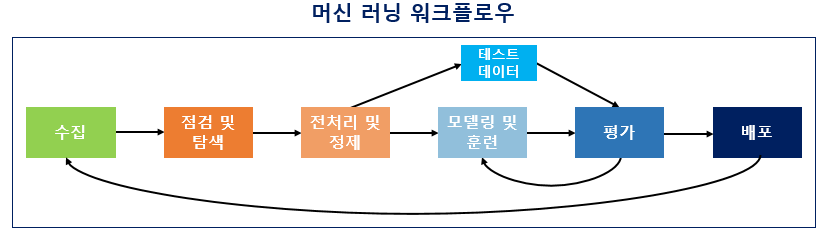

## **02. 텍스트 전처리**
**얻어낸 코퍼스(corpus-말뭉치)가 전처리 되지 않은 상태라면, 해당 데이터를 토큰화(tokenization)&정제(cleaning)&정규화(normalization)해야 한다.**



### **02-01 토큰화(Tokenization)**

코퍼스를 토큰이라는 작은 단위로 나누는 작업 : 토큰화

토큰의 단위는 상황에 따라 다르다. But, 보통 의미있는 단위로 토큰을 정의한다.


#### ***1. 단어 토큰화(Word Tokenization)***

토큰의 기준을 단어로 하는 경우, 단어 토큰화라고 한다. 여기서 단어는 단어 외에도 단어구, 의미를 갖는 문자열로도 간주된다.

Ex: 구두점과 같은 문자는 제외시키는 단어 토큰화

Time is an illusion. Lunctime double so! -> "Time", "is", "ab", "illusion", "Lunctime", "double", "so" (띄어쓰기를 기준으로 한 단어 토큰화)

하지만, 보통 토큰화는 단순히 구두점이나 특수문자를 전부 제거하는 정제 작업만으론 완료되지 않는다. 심지어 한국어는 띄어쓰기를 기준으로 토큰화를 진행한다면 문장의 의미가 퇴색된다. 



#### ***2. 다양한 토큰화 방식***

In [ ]:
%pip install nltk
%pip install tensorflow

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
print('단어 토큰화1 :',word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [ ]:
print('단어 토큰화2 :',WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [ ]:
print('단어 토큰화3 :',text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


#### ***3. 토큰화에서 교려해야할 사항***

<U>1) 구두점이나 특수 문자를 단순 제외해서는 안 된다.</U>

특수문자가 의미를 가지고 있는 경우에는 따로 토큰화를 시키기도 한다.<br>
Ex: Ph.D, AT&T, $45.55, 01/02/03
<br><br>
<U>2) 줄임말과 단어 내에 띄어쓰기가 있는 경우.</U>

Ex: I'm, we're, New York
<br><br>

<U>3) 표준 토큰화 예제</U>

Penn Treebank Tokenization

규칙1: 하이픈으로 구성된 단어는 하나로 유지한다.<br>
규칙2: doesn't와 같이 어포스트로피로 '접어'가 함께하는 단어는 분리해준다.

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print('트리뱅크 워드토크나이저 :',tokenizer.tokenize(text))

트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


#### ***4. 문장 토큰화***
앞선 예제들과는 달리 문장을 토큰의 단위로 삼는 경우를 보겠다.<br>
코퍼스 내에서 문장 단위로 구분하는 작업, 문장 분류(sentence segmentation)라고 불린다.

일반적으로 ., ?, !를 기준으로 문장을 잘라내면 될 것 같지만. 앞선 예제들과 같이 그렇지 않은 경우들이 존재한다.<br>
Ex: IP 183.567.24.56 서버, I'm looking for Ph.D

In [ ]:
from nltk.tokenize import sent_tokenize
# 일반적으로 마침표로 구분가능한 경우
text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print('문장 토큰화1 :',sent_tokenize(text))

문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [ ]:
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print('문장 토큰화2 :',sent_tokenize(text))

문장 토큰화2 : ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


In [ ]:
# 한국어 문장 토큰화
%pip install kss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.4 MB 49.2 MB/s 
     |████████████████████████████████| 131 kB 45.0 MB/s 
  Created wheel for kss: filename=kss-3.7.3-py3-none-any.whl size=42449195 sha256=9dd466ee5db013b6bac617110b6f38385d75251531e08fd9df4685fc6d07837c
  Stored in directory: /root/.cache/pip/wheels/98/1f/09/88481ab8924562c84ce946d2311fae8736151685f08fbc4663
Successfully built kss


In [ ]:
import kss

text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
print('한국어 문장 토큰화 :',kss.split_sentences(text))

한국어 문장 토큰화 : ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


#### ***5. 한국어에서의 토큰화의 어려움.***
영어의 경우, 합성어(New York)와 줄임말(he's)에 대한 예외처리만 한다면, 띄어쓰기를 기준으로하는 토큰화를 수행해도 단어 토큰화가 잘 작동한다.

하지만, 한국어의 경우 띄어쓰기 단위가 영어와 달리 '어절'이기 때문에 띄어쓰기 토큰화가 지양된다.<br>
이는 한국어가 교착어이기 때문(조사, 어미 등을 붙여서 말을 만드는 언어) 

<U>1)교착어의 특성</U>

한국어에는 조사가 존재하는데 이 조사의 형태에 따라 같은 의미임에도 불구하고 다르게 인식되는 경우가 있다. 이런 것들이 자연어 처리를 힘들게 한다.

---> 형태소를 단위로 토큰화를 진행한다. 형태소: 뜻을 가진 가장 작은 말의 단위<br>
- 자립 형태소: 접사, 어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소. 체언(명사,대명사,수사), 수식언(관형사,부사), 감탄사.
- 의존 형태소: 다른 형태소와 결합하여 사용되는 형태소. 접사,어미,조사,어간.
<br>
Ex: "에디가 책을 읽었다" -> 자립 형태소(에디, 책), 의존 형태소(-가, -을, 읽-, -었, -다)

<U>2)한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.</U>

한국어는 띄어쓰기를 하지 않더라도 이해할 수 있다.<br>
한국어 : 모아쓰기 방식, 영어 : 풀어쓰기 방식

#### ***6. 품사 태깅(Part-of-speech tagging)***
단어의 표기는 같아도 품사에 따라 의미가 달라지기도 한다. 영어 'fly', 한국어 '못'의 경우가 그렇다.<br>
따라서, 의미를 제대로 파악하기 위해 해당 단어가 어떤 품사로 쓰였는지 보는 것이 중요한 지표가 될 수 있다. <br>
토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지 구분하는 것 : 품사 태깅(part-of-speech tagging)이다.


#### ***7. NLTK와 KoNLPy를 이용한 영어,한국어 토큰화 실습***

In [ ]:
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)

print('단어 토큰화 :',tokenized_sentence)
print('품사 태깅 :',pos_tag(tokenized_sentence))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


단어 토큰화 : ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅 : [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


PRP : 인칭 대명사<br>
RB : 부사<br>
VBG : 현재부사<br>
IN : 전치사<br>
NNP : 고유 명사<br>
NNS : 복수형 명사<br>
CC : 접속사<br>
DT : 관사

한국어 자연어 처리를 위한 KoNLPy 파이썬 패키지.<br>
Okt, 메캅, 코모란, 한나눔, 꼬꼬마 : KoNLPy 내부 형태소 분석기 (형태소 토크나이저)

In [ ]:
%pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 465 kB 49.8 MB/s 


In [ ]:
import konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']


morphs : 형태소 추출<br>
pos : 품사 태깅<br>
nouns : 명사 추출<br>

In [ ]:
#14초 걸림
print('꼬꼬마 형태소 분석 :',kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅 :',kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 명사 추출 :',kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출 : ['코딩', '당신', '연휴', '여행']


### **02-02 정제(Cleaning) and 정규화(Normalization)**
토큰화 전후에 정제, 정규화를 실행한다.<br>
- 정제(cleaning) : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거한다. 
- 정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다. 


#### ***1. 규칙에 기반한 표기가 다른 단어들의 통함***
USA = US, uh-huh = uhhuh *normalization*
<br>
#### ***2. 대,소문자 통합***
대문자를 소문자로 변환하여도 의미가 변하지 않는 경우는 소문자 변환을 통해 정규화를 시킬 수 있다.<br>
US, 회사이름(General Motors) 같은 경우는 제외.

#### ***3. 불필요한 단어의 제거***
1) 등장 빈도가 적은 단어<br>
2) 길이가 짧은 단어


In [ ]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


### **02-03 어간 추출(Stemming) and 표제어 추출(Lemmatization)**
두 작업의 의미 : 표기상으론 서로 다른 단어들을 하나의 단어로 일반화 시킬 수 있다면, 하나의 단어로 일반화시켜서 문서 내의 단어를 줄인다.<br>
자연어처리에서 정규화의 지향점은 가지고 있는 코퍼스의 복잡성을 줄이는 것.

#### ***1. 표제어 추출(Lemmatization)***
표제어 : '기본 사전형 단어'<br>
표제어 추출을 하는 가장 섬세한 방법 : 형태학적 파싱<br>
형태소 : '의미를 가진 가장 작은 단위' 1)어간, 2)접사<br>

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전 :',words)
print('표제어 추출 후 :',[lemmatizer.lemmatize(word) for word in words])

표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


dy, ha와 같이 의미를 알 수 없는 단어를 출력하고 있다.<br>
표제어 추출기 WordNetLemmatizer()는 본래 단어의 품사 정보를 안다면 더 정확한 성능을 보여준다.

In [ ]:
lemmatizer.lemmatize('dies', 'v')

'die'

In [ ]:
lemmatizer.lemmatize('watched', 'v')

'watch'

In [ ]:
lemmatizer.lemmatize('has', 'v')

'have'

#### ***2. 어간 추출(Stemming)***
어간 추출 : 형태학적 분석을 단순화한 버전

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
tokenized_sentence = word_tokenize(sentence)

print('어간 추출 전 :', tokenized_sentence)
print('어간 추출 후 :',[stemmer.stem(word) for word in tokenized_sentence])

어간 추출 전 : ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후 : ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


포터스티머는 규칙 기반의 접근을 하므로 사전에는 없는 단어들 또한 포함하고 있다.

In [ ]:
words = ['formalize', 'allowance', 'electricical']

print('어간 추출 전 :',words)
print('어간 추출 후 :',[stemmer.stem(word) for word in words])

어간 추출 전 : ['formalize', 'allowance', 'electricical']
어간 추출 후 : ['formal', 'allow', 'electric']


In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


다른 두가지의 스태머를 적용하였을 떄, 다른 결과를 보여준다.<br>
따라서, 이미 존재하는 스태머를 사용하고자 할 땐 사용자의 코퍼스에 적합한 스태머를 판단하면 되겠다.

#### ***3. 한국어에서의 어간 추출***
용언에 해당하는 '동사', '형용사' 는 어간과 어미의 조합으로 구성되어 있다.

(1) 활용(conjugation) <br>
활용 : 용언의 어간이 어미를 가지는 일<br>
어간(stem) : 용언(동사, 형용사)을 활용할 때, 원칙적으로 모양이 변하지 않는 부분. 활용에서 어미에 선행하는 부분. 때론 어간의 모양도 바뀔 수 있음(예: 긋다, 긋고, 그어서, 그어라). 
어미(ending): 용언의 어간 뒤에 붙어서 활용하면서 변하는 부분이며, 여러 문법적 기능을 수행 


(2) 규칙 활용<br>
규칙 활용은 어간이 어미를 취할 떄, 어미의 모습이 일정한 경우.<br>
이러한 규칙을 사용하면 어간, 어미를 분리하기 용이하다.

(3) 불규칙 활용<br>
불규칙 활용은 어간이 어미를 취할 때 어간의 모습이 바뀌거나 취하는 어미가 특수한 어미일 경우<br>
단순 분리만으론 어간 추출이 불가능, 좀 더 복잡한 규칙 필요

### **02-04 불용어(Stopword)**
불용어 : 자주 등장하지만 분석을 하는 것에 있어서 큰 도움이 되지 않는 단어<br>
Ex: I, my, me, over, 조사, 접미사 etc..<br>
NLTK에서는 영어 불용어를 패키지에서 미리 정의하고 있다.

In [ ]:
%pip install konlpy

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt

#### ***1. NLTK에서 불용어 확인하기***

In [ ]:
nltk.download('stopwords')

In [ ]:
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


#### ***2. NLTK를 통해서 불용어 제거하기***

In [ ]:
example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result = []
for word in word_tokens: 
    if word not in stop_words: 
        result.append(word) 

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 : ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


#### ***3. 한국어에서 불용어 제거하기***

In [ ]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


불용어를 선택하는 기준은 절대적이지 않다.

### **02-05 정규 표현식(Regular Expression)**

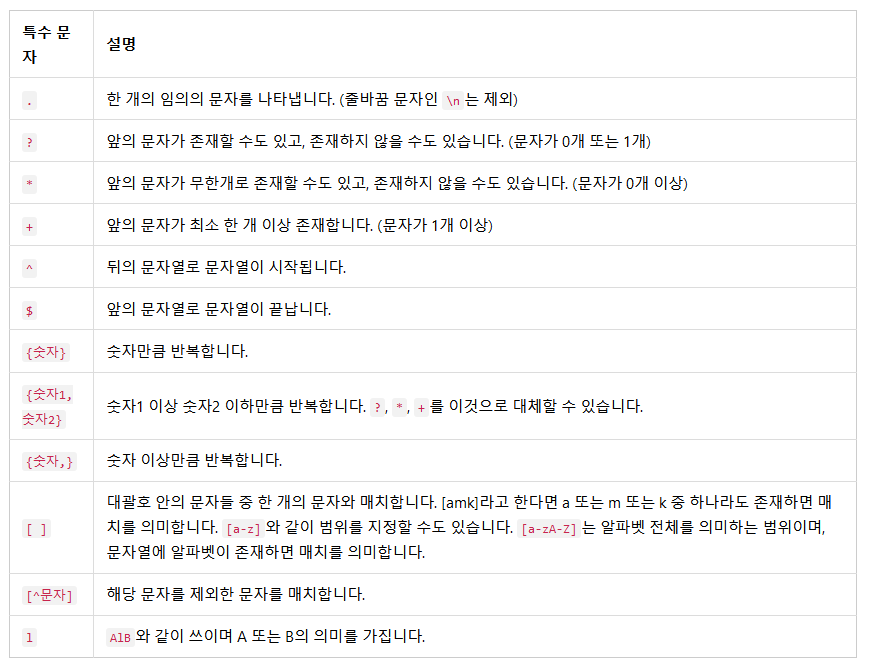

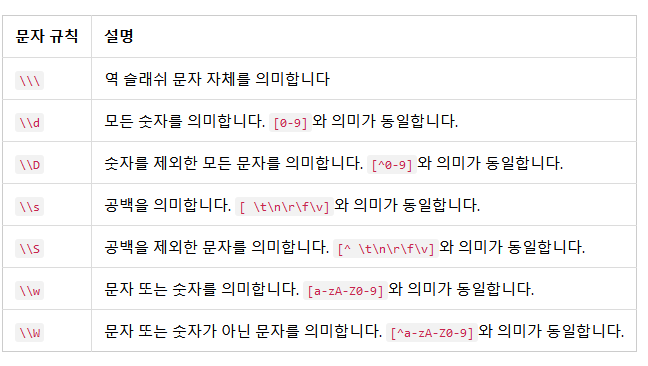

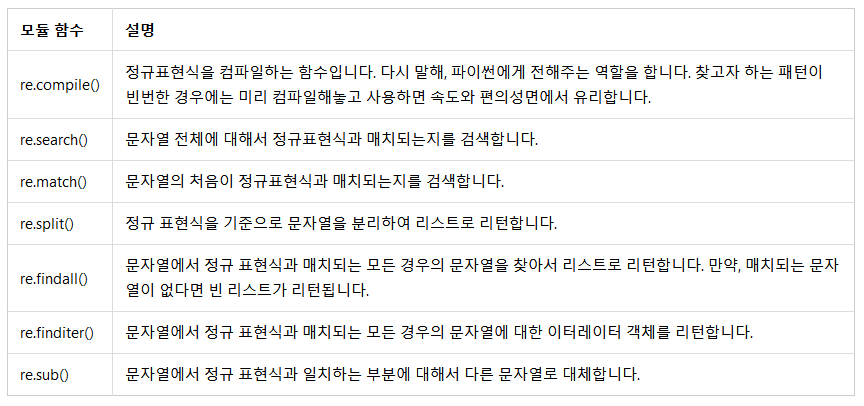

### **02-06 정수 인코딩(Integer Encoding)**
컴퓨터는 텍스트보다 숫자를 더 잘 처리한다.<br>
텍스트를 정수화하는 과정은 본격적으로 자연어 처리 작업에 들어간다는 의미이므로 이전에 텍스트 전처리를 끝내야 한다.

#### ***1. 정수 인코딩(Integer Encoding)***
빈도에 따라 오름차순으로 정수 부여하기

1) dictonary 사용하기

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

In [ ]:
# 문장 토큰화
sentences = sent_tokenize(raw_text)
print(sentences)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [ ]:
vocab = {}
preprocessed_sentences = []
stop_words = set(stopwords.words('english'))

for sentence in sentences:
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []

    for word in tokenized_sentence: 
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄인다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거한다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거한다.
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0 
                vocab[word] += 1
    preprocessed_sentences.append(result) 
print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [ ]:
print('단어 집합 :',vocab)

단어 집합 : {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [ ]:
# 'barber'라는 단어의 빈도수 출력
print(vocab["barber"])

8


빈도수가 높은 순서대로 정렬

In [ ]:
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [ ]:
word_to_index = {}
i = 0
for (word, frequency) in vocab_sorted :
    if frequency > 1 : # 빈도수가 작은 단어는 제외.
        i = i + 1
        word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


In [ ]:
vocab_size = 5

# 인덱스가 5 초과인 단어 제거
words_frequency = [word for word, index in word_to_index.items() if index >= vocab_size + 1]

# 해당 단어에 대한 인덱스 정보를 삭제
for w in words_frequency:
    del word_to_index[w]
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [ ]:
# word_to_index에 존재하지 않는 토큰화된 단어를 인코딩하는 경우 에러가 난다.
# 이를 방지하기 위해 해당 딕셔너리에 'OOV'(Out of Vocabulary)인덱스를 추가한다.
word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


In [ ]:
encoded_sentences = []
for sentence in preprocessed_sentences:
    encoded_sentence = []
    for word in sentence:
        try:
            # 단어 집합에 있는 단어라면 해당 단어의 정수를 리턴.
            encoded_sentence.append(word_to_index[word])
        except KeyError:
            # 만약 단어 집합에 없는 단어라면 'OOV'의 정수를 리턴.
            encoded_sentence.append(word_to_index['OOV'])
    encoded_sentences.append(encoded_sentence)
print(encoded_sentences)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


2) Counter 사용하기

In [ ]:
from collections import Counter
print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [ ]:
# words = np.hstack(preprocessed_sentences)으로도 수행 가능.
all_words_list = sum(preprocessed_sentences, [])
print(all_words_list)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


In [ ]:
# 파이썬의 Counter 모듈을 이용하여 단어의 빈도수 카운트
vocab = Counter(all_words_list)
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [ ]:
print(vocab["barber"]) # 'barber'라는 단어의 빈도수 출력

8


In [ ]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [ ]:
word_to_index = {}
i = 0
for (word, frequency) in vocab :
    i = i + 1
    word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


3) NLTK의 FreqDist 사용하기

In [ ]:
from nltk import FreqDist
import numpy as np

In [ ]:
# np.hstack으로 문장 구분을 제거
vocab = FreqDist(np.hstack(preprocessed_sentences))

In [ ]:
print(vocab["barber"]) # 'barber'라는 단어의 빈도수 출력

8


In [ ]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]


In [ ]:
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


4) enumerate 이해하기

In [ ]:
test_input = ['a', 'b', 'c', 'd', 'e']
for index, value in enumerate(test_input): # 입력의 순서대로 0부터 인덱스를 부여함.
  print("value : {}, index: {}".format(value, index))

value : a, index: 0
value : b, index: 1
value : c, index: 2
value : d, index: 3
value : e, index: 4


#### ***2. 케라스(Keras)의 텍스트 전처리***

정수 인코딩을 위해서 토크나이저를 사용하기도 한다.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(preprocessed_sentences) 

In [ ]:
print(tokenizer.word_index) #개 간편...!

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [ ]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [ ]:
print(tokenizer.texts_to_sequences(preprocessed_sentences)) # ㄴ0ㄱ

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [ ]:
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 5개 단어만 사용
tokenizer.fit_on_texts(preprocessed_sentences)

In [ ]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [ ]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [ ]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)

In [ ]:
vocab_size = 5
words_frequency = [word for word, index in tokenizer.word_index.items() if index >= vocab_size + 1] 

# 인덱스가 5 초과인 단어 제거
for word in words_frequency:
    del tokenizer.word_index[word] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[word] # 해당 단어에 대한 카운트 정보를 삭제

print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(preprocessed_sentences))

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}
OrderedDict([('barber', 8), ('person', 3), ('huge', 5), ('secret', 6), ('kept', 4)])
[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [ ]:
# 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
tokenizer.fit_on_texts(preprocessed_sentences)

In [ ]:
print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [ ]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


### **02-07 패딩(Padding)**

#### ***1. Numpy로 패딩하기***

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


데이터를 동일한 길이로 맞추기.

In [ ]:
max_len = max(len(item) for item in encoded)
print('최대 길이 :',max_len)

최대 길이 : 7


In [ ]:
# zero padding
for sentence in encoded:
    while len(sentence) < max_len:
        sentence.append(0)

padded_np = np.array(encoded)
padded_np

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

같은 길이를 가지게 해 행렬 모양으로 만들고 병렬처리를 하기 위함

#### ***2. 케라스 전처리 도구로 패딩하기***

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [ ]:
padded = pad_sequences(encoded)
padded # numpy와는 다른 결과. 값 앞에 0을 채움.

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]], dtype=int32)

In [ ]:
padded = pad_sequences(encoded, padding='post')
padded

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]], dtype=int32)

In [ ]:
padded = pad_sequences(encoded, padding='post', maxlen=5) # maxlen: 최대 값을 지정할 때, 길이를 초과하는 경우 앞의 데이터를 삭제한다.
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0]], dtype=int32)

In [ ]:
padded = pad_sequences(encoded, padding='post', truncating='post', maxlen=5)
padded  # truncating : 뒤의 값을 삭제하고자 할 떄

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 7,  7,  3,  2, 10],
       [ 1, 12,  3, 13,  0]], dtype=int32)

In [ ]:
last_value = len(tokenizer.word_index) + 1 # 단어 집합의 크기보다 1 큰 숫자를 사용
print(last_value)

14


In [ ]:
padded = pad_sequences(encoded, padding='post', value=last_value)
padded

array([[ 1,  5, 14, 14, 14, 14, 14],
       [ 1,  8,  5, 14, 14, 14, 14],
       [ 1,  3,  5, 14, 14, 14, 14],
       [ 9,  2, 14, 14, 14, 14, 14],
       [ 2,  4,  3,  2, 14, 14, 14],
       [ 3,  2, 14, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  2, 14, 14, 14, 14],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13, 14, 14, 14]], dtype=int32)

### **02-08 원-핫 인코딩(One-Hot Encoding)**

#### ***1. 원-핫 인코딩(One-Hot Encoding)이란?***
단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식

In [ ]:
from konlpy.tag import Okt  

okt = Okt()  
tokens = okt.morphs("나는 자연어 처리를 배운다")  
print(tokens)

['나', '는', '자연어', '처리', '를', '배운다']


In [ ]:
word_to_index = {word : index for index, word in enumerate(tokens)}
print('단어 집합 :',word_to_index)

단어 집합 : {'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [ ]:
# 토큰을 입력하면 해당 토큰에 대한 원-핫 벡터를 만들어내는 함수
def one_hot_encoding(word, word_to_index):
  one_hot_vector = [0]*(len(word_to_index))
  index = word_to_index[word]
  one_hot_vector[index] = 1
  return one_hot_vector

In [ ]:
one_hot_encoding("자연어", word_to_index)

[0, 0, 1, 0, 0, 0]

#### ***2. 케라스(Keras)를 이용한 원-핫 인코딩(One-Hot Encoding)***

In [ ]:
text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
print('단어 집합 :',tokenizer.word_index)

단어 집합 : {'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


In [ ]:
sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded = tokenizer.texts_to_sequences([sub_text])[0]
print(encoded)

[2, 5, 1, 6, 3, 7]


In [ ]:
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


#### ***3. 원-핫 인코딩(One-Hot Encoding)의 한계***

단어의 개수가 N개인 경우, N x N 행렬이 만들어진다.<br>
단어간 유사성을 알 수 없다.


이러한 단점을 보완한 기법<br>
: (카운트 기반) LSA, HAL <br>
  (예측 기반) NNLM, RNNLM, Word2Vec, FastText<br>
  둘다 사용한 경우 : GloVe

### **02-09 데이터의 분리(Splitting Data)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#### ***1. 지도 학습(Supervised Learning)***
1) train - test 분리<br>
2) labeling

#### ***2. X와 y분리하기***
1) zip 함수를 이용하여 분리하기

In [ ]:
X, y = zip(['a', 1], ['b', 2], ['c', 3])
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


In [ ]:
# 리스트의 리스트 또는 행렬 또는 뒤에서 배울 개념인 2D 텐서.
sequences = [['a', 1], ['b', 2], ['c', 3]]
X, y = zip(*sequences)
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


2) 데이터프레임을 이용하여 분리하기

In [ ]:
values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

메일 본문  스팸 메일 유무
0        당신에게 드리는 마지막 혜택!         1
1    내일 뵐 수 있을지 확인 부탁드...         0
2    도연씨. 잘 지내시죠? 오랜만입...         0
3  (광고) AI로 주가를 예측할 수 있다!         1

In [ ]:
X = df['메일 본문']
y = df['스팸 메일 유무']

In [ ]:
print('X 데이터 :',X.to_list())
print('y 데이터 :',y.to_list())

X 데이터 : ['당신에게 드리는 마지막 혜택!', '내일 뵐 수 있을지 확인 부탁드...', '도연씨. 잘 지내시죠? 오랜만입...', '(광고) AI로 주가를 예측할 수 있다!']
y 데이터 : [1, 0, 0, 1]


3) Numpy를 이용하여 분리하기

In [ ]:
np_array = np.arange(0,16).reshape((4,4))
print('전체 데이터 :')
print(np_array)

전체 데이터 :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [ ]:
X = np_array[:, :3]
y = np_array[:,3]

print('X 데이터 :')
print(X)
print('y 데이터 :',y)

X 데이터 :
[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
y 데이터 : [ 3  7 11 15]


#### ***3. 테스트 데이터 분리하기***

1) 사이킷 런을 이용하여 분리하기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234) #Sickit-learn

In [ ]:
X, y = np.arange(10).reshape((5, 2)), range(5)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y 전체 데이터 :
[0, 1, 2, 3, 4]


In [ ]:
# 7:3의 비율로 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
print('X 훈련 데이터 :')
print(X_train)
print('X 테스트 데이터 :')
print(X_test)

X 훈련 데이터 :
[[2 3]
 [4 5]
 [6 7]]
X 테스트 데이터 :
[[8 9]
 [0 1]]


In [ ]:
print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


In [ ]:
# random_state의 값을 변경
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[4, 0, 3]
y 테스트 데이터 :
[2, 1]


In [ ]:
# random_state을 이전의 값이었던 1234로 변경
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


random_state의 값을 고정해두면 실행할 때마다 항상 동일한 순서로 데이터를 섞는다.

2) 수동으로 분리하기

In [ ]:
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
X, y = np.arange(0,24).reshape((12,2)), range(12)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
y 전체 데이터 :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [ ]:
num_of_train = int(len(X) * 0.8) # 데이터의 전체 길이의 80%에 해당하는 길이값을 구한다. train data의 개수
num_of_test = int(len(X) - num_of_train) # 전체 길이에서 80%에 해당하는 길이를 뺀다.
print('훈련 데이터의 크기 :',num_of_train)
print('테스트 데이터의 크기 :',num_of_test)

훈련 데이터의 크기 : 9
테스트 데이터의 크기 : 3


In [ ]:
X_test = X[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
X_train = X[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장

In [ ]:
print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
[[18 19]
 [20 21]
 [22 23]]
y 테스트 데이터 :
[9, 10, 11]


### **02-10 한국어 전처리 패키지(Text Preprocessing Tools for Korean Text)**

#### ***1. PyKoSpacing***

In [ ]:
%pip install git+https://github.com/haven-jeon/PyKoSpacing.git

PyKoSpacing은 띄어쓰기가 되어있지 않은 문장을 띄어쓰기 한 문장으로 변환해주는 패키지다.

In [2]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [3]:
from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent) 

print(sent)
print(kospacing_sent)

1/1 [==============================] - 1s 721ms/step
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


#### ***2. Py-Hanspell***
네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지

In [ ]:
%pip install git+https://github.com/ssut/py-hanspell.git

In [5]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [6]:
# 이 패키지는 띄어쓰기 또한 보장한다.
spelled_sent = spell_checker.check(new_sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)
print(kospacing_sent) # 앞서 사용한 kospacing 패키지에서 얻은 결과

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


#### ***3. SOYNLP를 이용한 단어 토큰화***
soynlp는 품사 태깅, 단어 토큰화 등을 지원하는 단어 토크나이저<br>
비지도 학습으로 단어 토큰화 진행. 

In [ ]:
%pip install soynlp

1) 신조어 문제



In [ ]:
%pip install konlpy

In [12]:
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))
# 에이비식스, 이대휘, 최애돌 등의 신조어, 고유명사를 형태소로 제대로 파악하지 못하고 있다.
# --> 특정 문자 시퀀스 빈도, 앞 뒤 단어들이 나올 확률을 고려해서 판단한다면? : konlpy

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


2) 학습하기

soynlp는 학습에 기반한 토크나이저.

In [13]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [14]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x7fc2a3801130>)

In [15]:
# 훈련 데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [16]:
# 상위 3개의 문서 출력
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

In [17]:
# soynlp는 학습 기반의 단어 토크나이저, 전체 코퍼스로부터 응집 확률, 브랜칭 엔트로피 단어 점수표를 만듦

In [18]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()
# 학습완료

training was done. used memory 1.806 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


3) SOYNLP의 응집 확률(cohesion probability)

하나의 단어에 관해, 한 글자를 기준으로 몇번쨰에서 나타날 확률이 가장 큰지에 관한 확률.

Ex: '반포한강공원에'라는 단어에서 어떤 단어가 나올 가능성이 가장 높은지 계싼하는 것.

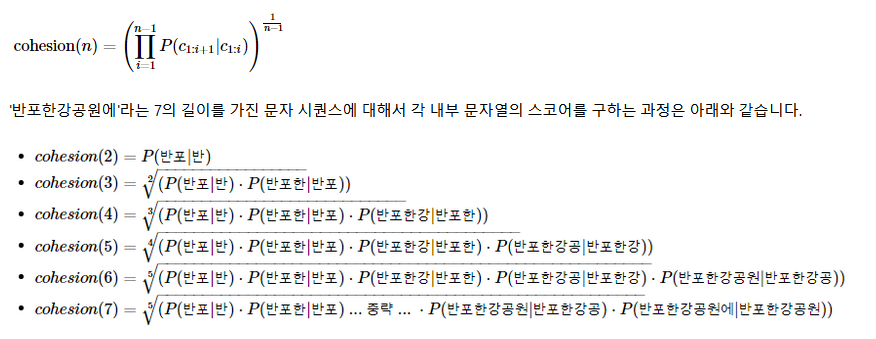

In [19]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [20]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [21]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [22]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [23]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

4) SOYNLP의 브랜칭 엔트로피(branching entropy)

확률 분포의 엔트로피값을 사용한다.

In [24]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [25]:
word_score_table["디스플"].right_branching_entropy

-0.0

In [26]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [27]:
word_score_table["디스플레이"].right_branching_entropy
# 디스플레이 뒤에 조사나 다른 단어가 올 수 있기에 엔트로피 값이 증가한다.

3.1400392861792916

5) SOYNLP의 L tokenizer

한국어는 띄어쓰기 단위로 나눈 어절 토큰은 주로 L 토큰 + R 토큰의 형식을 가질 때가 많다.

In [28]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

6) 최대 점수 토크나이저

띄어쓰기가 아직 안된 상태에서 최대한으로 L,R토큰으로 구분

In [29]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

### **4. SOYNLP를 이용한 반복되는 문자 정제**

In [30]:
from soynlp.normalizer import *

In [31]:
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


In [32]:
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하핫', num_repeats=2))

와하하핫
와하하핫
와하하핫


### **5. Customized KoNLPy**

형태소 분석 입력 : '은경이는 사무실로 갔습니다.'<br>
형태소 분석 결과 : ['은', '경이', '는', '사무실', '로', '갔습니다', '.']<br>
'은경'이 사람이름이라는 것을 알려줘야 하는 경우

In [ ]:
%pip install customized_konlpy

In [35]:
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.morphs('은경이는 사무실로 갔습니다.')

/usr/local/lib/python3.8/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은', '경이', '는', '사무실', '로', '갔습니다', '.']

In [36]:
twitter.add_dictionary('은경이', 'Noun') # customize

In [37]:
twitter.morphs('은경이는 사무실로 갔습니다.')

['은경이', '는', '사무실', '로', '갔습니다', '.']